Chapter 5: FIR Filters An exploration of phase / group delay

In [99]:
import numpy as np
from scipy import signal, fftpack
from matplotlib import pyplot as plt

C:\Users\zacha\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


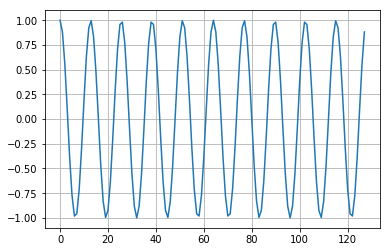

In [164]:
t = np.arange(128)
Fs = 128
F = 10
sig_in = np.cos(2*np.pi*F/Fs*t) + 1j*np.sin(2*np.pi*F/Fs*t)
plt.plot(sig_in)
plt.grid(True)

C:\Users\zacha\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


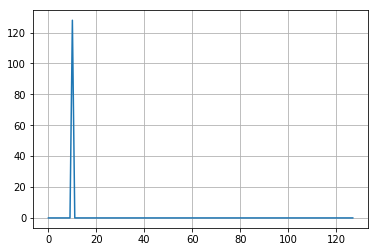

In [165]:
plt.plot(fftpack.fft(sig_in))
plt.grid(True)

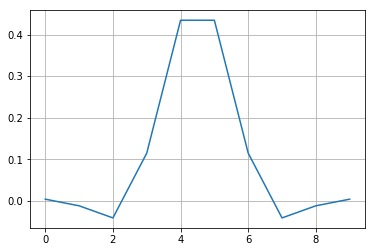

In [166]:
# create basic filter
coeffs = signal.firwin(10,0.5)
plt.plot(coeffs)
plt.grid(True)

In [167]:
group_delay = (coeffs.size-1)/2
phase = -group_delay / 128 * 360

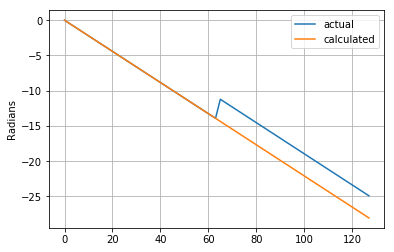

In [168]:
coeff_fft = (fftpack.fft(coeffs,128))

x_axis = np.arange(128)
plt.plot(x_axis, (np.unwrap(np.angle(coeff_fft))), label='actual')
plt.grid(True)
plt.ylabel('Radians')
plt.plot(x_axis,np.arange(128)*phase*np.pi/180, label='calculated')
plt.legend()

Okay theoretical matches actual until Fs/2

In [169]:
sig_out = signal.convolve(sig_in,coeffs)

C:\Users\zacha\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Studying group delay - Time')

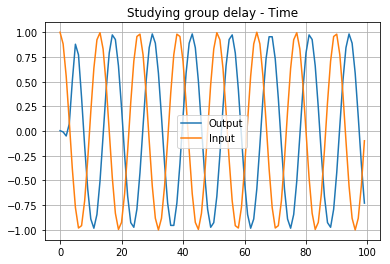

In [170]:
plt.plot(sig_out[0:100],label='Output')
plt.plot(sig_in[0:100],label='Input')
plt.grid(True)
plt.legend()
plt.title('Studying group delay - Time')

Text(0.5,1,'Phase delay')

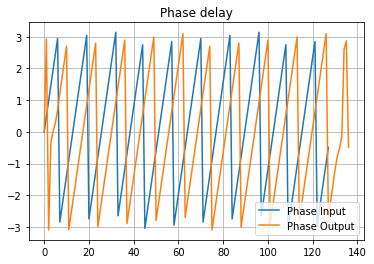

In [171]:
phase1 = np.angle(sig_in)
phase2 = np.angle(sig_out)
difference = phase1 - phase2[0:128]
plt.plot(phase1, label='Phase Input')
plt.plot(phase2, label='Phase Output')
plt.grid(True)
plt.legend()
plt.title('Phase delay')


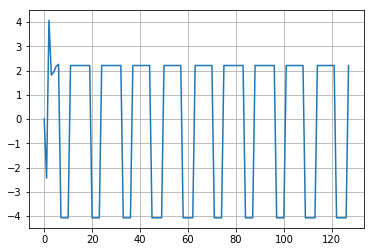

In [172]:
plt.plot(difference)
plt.grid(True)

In [173]:
difference[20]

-4.0742529726242624

In [174]:
group_delay/128*360*np.pi/180*F

2.208932334555323

calculated matches example